<a href="https://colab.research.google.com/github/smartinternz02/SBSPS-Challenge-10437-1691070582/blob/main/Final_Team_Terror_404_IBM_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from datetime import datetime
import warnings

##2. Getting Data

In [218]:
data = pd.read_csv('/content/collegePlace.csv')
data.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [219]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


##3. EDA and Visualizations

In [220]:
print(f"Shape of Dataframe is: {data.shape}")

Shape of Dataframe is: (2966, 8)


In [221]:
print('Datatype in Each Column\n')
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column



,Datatype
Column Name,
Age,int64
Gender,object
Stream,object
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64


In [222]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


In [223]:
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


In [224]:
cor = data.corr()

<ipython-input-224-06847dd9a2e1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

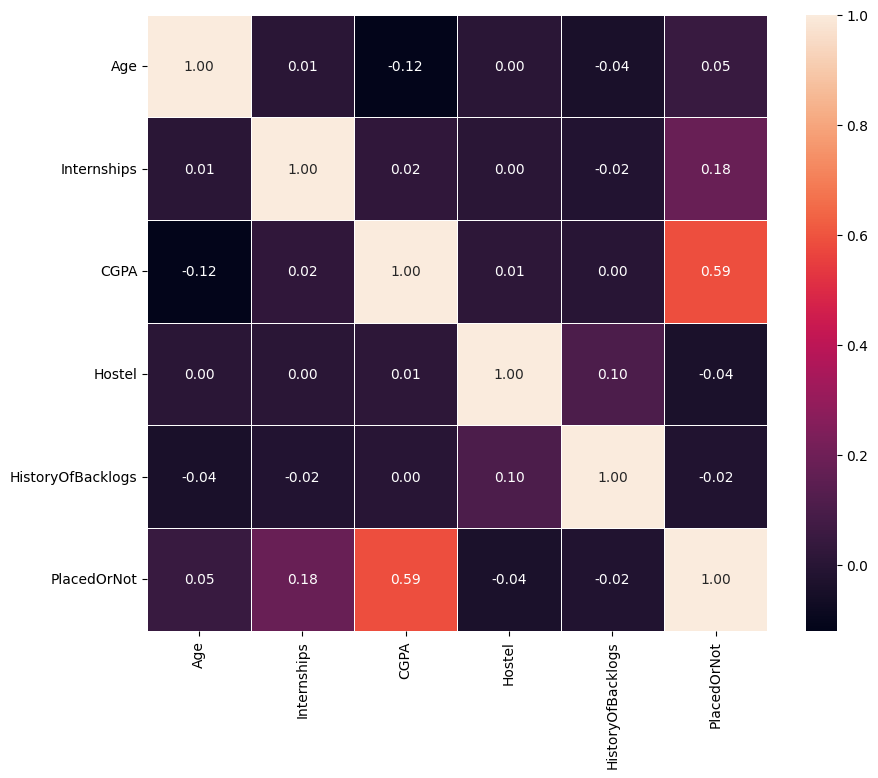

In [226]:
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(cor,annot=True,fmt=".2f", linewidth=.5)
plt.show()

###Inference from the above visualization
Internship & CGPA are coorelated with the dependent feature PlacedOrNot

In [227]:
stream_d = data.groupby('Stream').agg({'Age':'mean', 'Internships' : 'sum', "CGPA":'mean', 'PlacedOrNot':'sum'})
stream_d.style.highlight_max()

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
Civil,21.441640,173,7.094637,146
Computer Science,21.559278,676,7.039948,452
Electrical,21.299401,203,7.080838,181
Electronics And Communication,21.410377,306,7.125000,251
Information Technology,21.539797,509,7.073806,409
Mechanical,21.518868,220,7.063679,200


###Inference
1. Computer Science students got placed more than the students from other streams
2. CS students have done higher number of cumulative internships as compared to other streams.
3. ECE branch has the highest average CGPA.

In [228]:
#Visualizing the above inference
px.bar(data_frame=stream_d, barmode='group', title = "Stream wise Analyzing")

In [229]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [230]:
male = data[data['Gender'] == "Male"]
female = data[data['Gender'] == "Female"]

In [231]:
male.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0


In [232]:
total_male = male.shape[0]
total_female = female.shape[0]

In [233]:
total_male_passed = male[male['PlacedOrNot']== 1 ].shape[0]
total_female_passed = female[female['PlacedOrNot']== 1].shape[0]

In [234]:
total_male_passed

1364

In [235]:
male_passed_percentage = np.round((total_male_passed * 100) / total_male,2)
female_passed_percentage = np.round((total_female_passed * 100) / total_female,2)

In [236]:
d = {'Total male': total_male, 'Total female': total_female, 'Total male passed': total_male_passed, 'Total female passed': total_female_passed, '% of male passed': male_passed_percentage,  '% of female passed': female_passed_percentage  }

In [237]:
d

{'Total male': 2475,
 'Total female': 491,
 'Total male passed': 1364,
 'Total female passed': 275,
 '% of male passed': 55.11,
 '% of female passed': 56.01}

###Inference
1. The male to female ratio is approx 5:1.
2. Higher percentage of females are placed as compared to males.

In [238]:
g_data = pd.DataFrame(d, index = ['Data'] )

In [239]:
g_data.T

,Data
Total male,2475.00
Total female,491.00
Total male passed,1364.00
Total female passed,275.00
% of male passed,55.11
% of female passed,56.01


In [240]:
df_g = data.groupby(['Gender', 'PlacedOrNot']).size().reset_index()
df_g['percentage'] = data.groupby(['Gender', 'PlacedOrNot']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['Gender', 'PlacedOrNot', 'Counts', 'Percentage']

px.bar(df_g, x='Gender', y=['Counts'], color='PlacedOrNot', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

<ipython-input-240-bb6a5b3d06ac>:2: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [241]:
df_g = data.groupby(['Stream', 'PlacedOrNot']).size().reset_index()
df_g['percentage'] = data.groupby(['Stream', 'PlacedOrNot']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['Stream', 'PlacedOrNot', 'Counts', 'Percentage']

px.bar(df_g, x='Stream', y=['Counts'], color='PlacedOrNot', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

<ipython-input-241-32fc4c834c9f>:2: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



### Inference
1. Higher percentage of students were placed from ECE, IT and CS streams as compared to others.

##4. Data Preprocessing

In [242]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil"])
data["Stream"] = le.transform(data['Stream'])

In [243]:
le.transform(['Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil"])

array([3, 1, 4, 5, 2, 0])

In [244]:
d = {x:le2.classes_.tolist().index(x) for x in le2.classes_}

In [245]:
d

{'Female': 0, 'Male': 1}

In [246]:
d = {x:le.classes_.tolist().index(x) for x in le.classes_}
d

{'Civil': 0,
 'Computer Science': 1,
 'Electrical': 2,
 'Electronics And Communication': 3,
 'Information Technology': 4,
 'Mechanical': 5}

In [247]:
le2 = preprocessing.LabelEncoder()
le2.fit(['Male', 'Female'])
data["Gender"] = le2.transform(data['Gender'])

In [248]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [146]:
# #One Hot Encoding
# gender = pd.get_dummies(data['Gender'])
# stream = pd.get_dummies(data['Stream'])

In [ ]:
# data = pd.concat([data.drop(["Gender", "Stream"], axis = 1), gender, stream], axis = 1)
# data

In [39]:
data = data[['Age', 'Male', 'Female',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil",
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]
data

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,0,0,0,0,0,1,8,1,1,1
1,21,0,1,0,1,0,0,0,0,0,7,1,1,1
2,22,0,1,0,0,1,0,0,0,1,6,0,0,1
3,21,1,0,0,0,1,0,0,0,0,8,0,1,1
4,22,1,0,0,0,0,1,0,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,0,0,0,1,0,0,0,0,7,0,0,0
2962,23,1,0,0,0,0,1,0,0,1,7,1,0,0
2963,22,1,0,0,0,1,0,0,0,1,7,0,0,0
2964,22,1,0,0,1,0,0,0,0,1,7,0,0,0


In [147]:
#Standard scaling
scaler = StandardScaler()

scaler.fit(data.drop('PlacedOrNot',axis=1))

scaled_features = scaler.transform(data.drop('PlacedOrNot',axis=1))
scaled_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
scaled_features.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,0.445403,0.264655,0.400445,0.957191,1.648269,2.050246
1,-0.366752,-2.245158,-0.944846,-0.950773,-0.076310,1.648269,2.050246
2,0.388131,-2.245158,0.869405,0.400445,-1.109812,-0.606697,-0.487746
3,-0.366752,0.445403,0.869405,-0.950773,0.957191,-0.606697,2.050246
4,0.388131,0.445403,1.474156,-0.950773,0.957191,1.648269,-0.487746


In [250]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data.drop(['PlacedOrNot'],axis=1)), np.array(data['PlacedOrNot']), test_size = 0.25, random_state=42)

print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}\n")
print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_test is: {y_test.shape}")

Shape of X_train is: (2224, 7)
Shape of X_test is: (742, 7)

Shape of y_train is: (2224,)
Shape of y_test is: (742,)


##5. Model Selection

In [251]:
models = {"DecisionTree":DecisionTreeClassifier(),
         "RandomForest":RandomForestClassifier(),
         "XgBoost": XGBClassifier(),
         "KNeighborsClassifier":KNeighborsClassifier()}

In [252]:
def model_acc(models, X_train, X_test, y_train, y_test):
  acc = {}
  for model in models:
    mp = models[model]
    mp.fit(X_train, y_train)
    acc[model] = mp.score(X_test, y_test)
  return pd.DataFrame(acc, index = ['Test accuracy'] ).T


In [253]:
m_acc = model_acc(models, X_train, X_test, y_train, y_test)
m_acc.style.highlight_max()

,Test accuracy
DecisionTree,0.876011
RandomForest,0.876011
XgBoost,0.880054
KNeighborsClassifier,0.858491


In [254]:
m_acc = m_acc.reset_index().rename({"index":"Model"}, axis = 1)

In [255]:
fig = px.bar(data_frame = m_acc, x = 'Model', y = "Test accuracy", text = "Test accuracy", color = "Model", title = "<b>Models Accuracy</b>")
fig.update_traces(width=0.5)

fig.show()

###Inference
XgBoost gives the maximum accuracy

In [256]:
#Model Training

classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [257]:
confusion_matrix(y_test, y_pred)

array([[318,  26],
       [ 63, 335]])

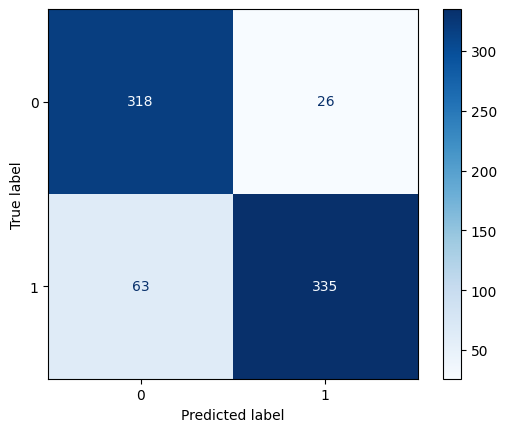

In [258]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap = plt.cm.Blues)

##6. Hyperparameter Optimization

In [259]:
param_dist = {
     "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
}

In [260]:
random_search = RandomizedSearchCV(classifier,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5, verbose=3)

In [261]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [262]:
xgb_best_params = random_search.best_estimator_

In [263]:
print(xgb_best_params)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


## 7. Evaluation

In [264]:
random_search.best_score_

0.9384703665636505

In [265]:
import joblib

joblib.dump(random_search, 'model.pkl')

['model.pkl']

In [164]:
x = joblib.load("model.pkl")

In [165]:
x.best_score_

0.9398614573216187

In [268]:
random_search.predict(X_test[6].reshape(1,7))

array([0])

In [274]:
random_search.predict_proba(X_test[6].reshape(1,7))[0][1]

0.08702055